<a href="https://colab.research.google.com/github/larissavvsous/Mineracao-de-Dados/blob/main/Exercicio_DM_Hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

sample_url = "/content/drive/MyDrive/data-mineracao/Mall_Customers.csv"
sample_data = pd.read_csv("/content/drive/MyDrive/data-mineracao/Mall_Customers.csv")

sample_data

,ID Cliente,Genero,Age,ComprasAnuais (R$),Score de Gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,),45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Pre processing e limpeza

In [25]:
sample_data = sample_data.rename(columns={'Age': 'Idade'})
sample_data

,ID Cliente,Genero,Idade,ComprasAnuais (R$),Score de Gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,),45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
sample_data.isnull().sum() # verificando se há valores faltantes

ID Cliente                 0
Genero                     0
Idade                      0
ComprasAnuais (R$)         0
Score de Gastos (1-100)    0
dtype: int64

In [27]:
# excluindo a linha que possui o caractere ')'
sample_data = sample_data[sample_data['Genero'] != ')']
sample_data = sample_data.reset_index(drop=True)
sample_data

,ID Cliente,Genero,Idade,ComprasAnuais (R$),Score de Gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
194,195,Female,47,120,16
195,196,Female,35,120,79
196,198,Male,32,126,74
197,199,Male,32,137,18


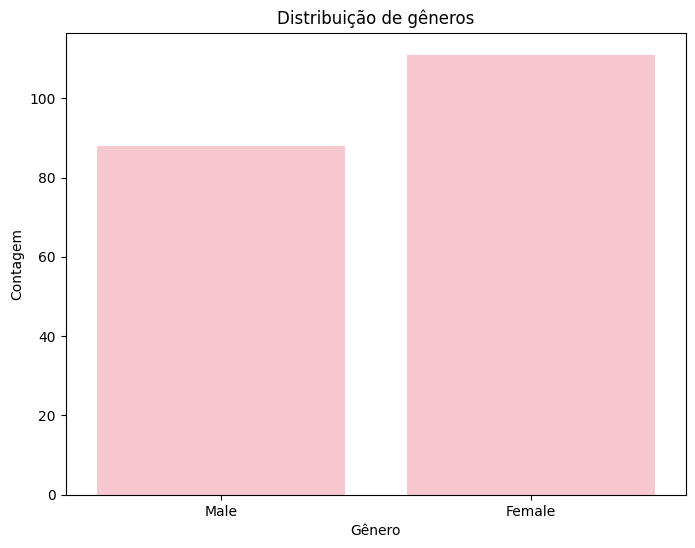

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Genero', data=sample_data, color='pink')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Distribuição de gêneros')
plt.show()

In [29]:
sample_data[['Idade', 'ComprasAnuais (R$)', 'Score de Gastos (1-100)']].describe()   # algumas análises descritivas

,Idade,ComprasAnuais (R$),Score de Gastos (1-100)
count,199.000000,199.000000,199.000000
mean,38.819095,59.663317,54.909548
std,13.997382,26.426231,72.079725
min,18.000000,-20.000000,1.000000
25%,28.500000,40.000000,35.000000
50%,36.000000,61.000000,50.000000
75%,49.000000,77.500000,73.000000
max,70.000000,137.000000,1000.000000


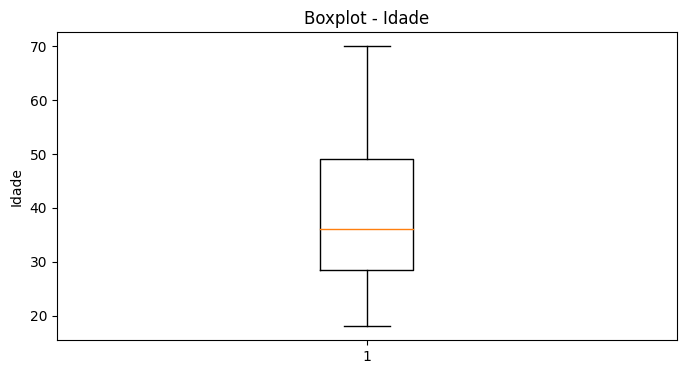

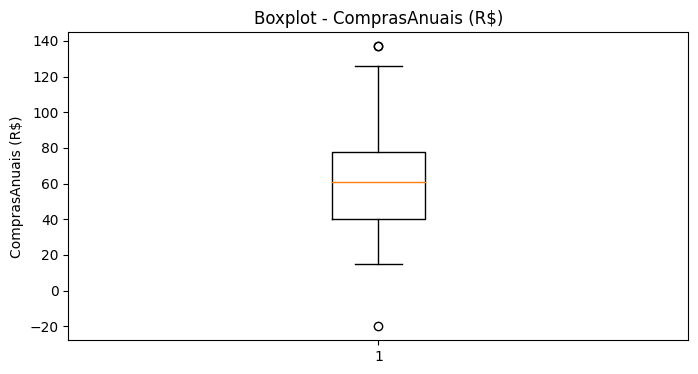

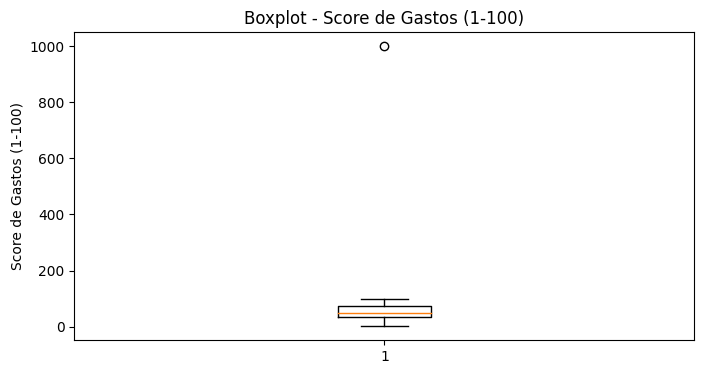

In [30]:
import matplotlib.pyplot as plt     # analisando de forma gráfica

plt.figure(figsize=(8, 4))
plt.boxplot(sample_data['Idade'])
plt.title('Boxplot - Idade')
plt.ylabel('Idade')
plt.show()

plt.figure(figsize=(8, 4))
plt.boxplot(sample_data['ComprasAnuais (R$)'])
plt.title('Boxplot - ComprasAnuais (R$)')
plt.ylabel('ComprasAnuais (R$)')
plt.show()

plt.figure(figsize=(8, 4))
plt.boxplot(sample_data['Score de Gastos (1-100)'])
plt.title('Boxplot - Score de Gastos (1-100)')
plt.ylabel('Score de Gastos (1-100)')
plt.show()

In [31]:
mediana_compras_anuais = sample_data['ComprasAnuais (R$)'].median()   # substituindo valores menores e iguais que zero pela mediana
sample_data.loc[sample_data['ComprasAnuais (R$)'] <= 0, 'ComprasAnuais (R$)'] = mediana_compras_anuais
mediana_compras_anuais

61.0

In [32]:
mediana_gastos = sample_data['Score de Gastos (1-100)'].median()      # Substituindo os valores muito altos em 'Score de Gastos (1-100)' pela mediana
sample_data.loc[sample_data['Score de Gastos (1-100)'] > 100, 'Score de Gastos (1-100)'] = mediana_gastos
mediana_gastos

50.0

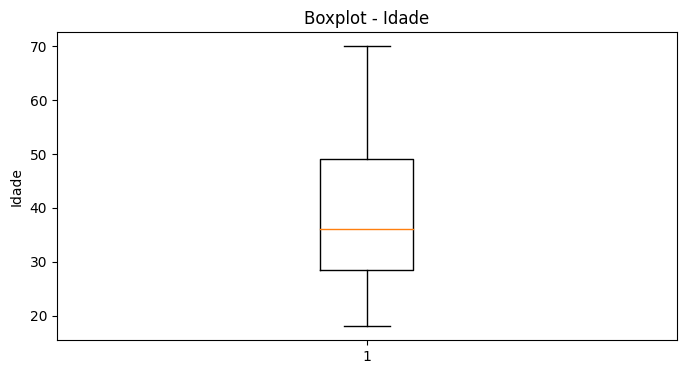

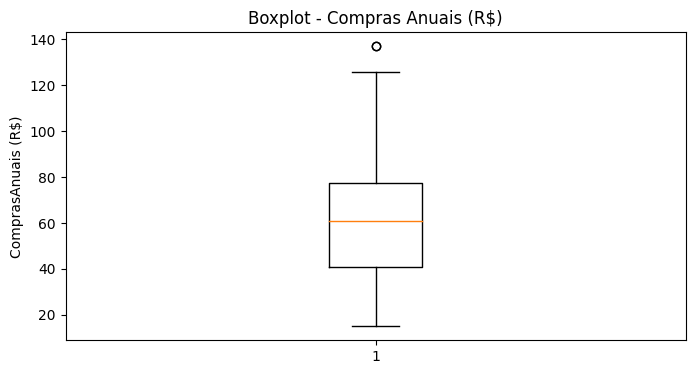

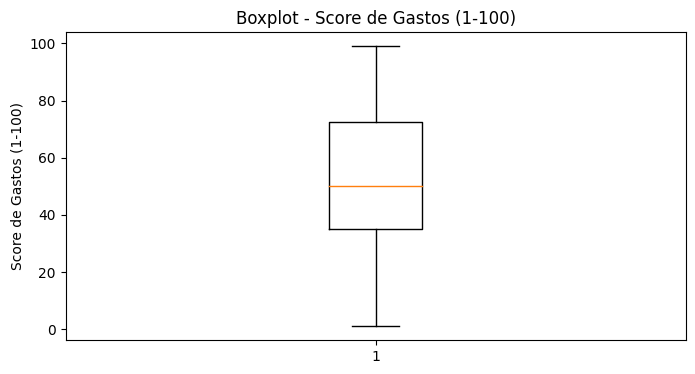

In [33]:
plt.figure(figsize=(8, 4))
plt.boxplot(sample_data['Idade'])
plt.title('Boxplot - Idade')
plt.ylabel('Idade')
plt.show()

plt.figure(figsize=(8, 4))
plt.boxplot(sample_data['ComprasAnuais (R$)'])
plt.title('Boxplot - Compras Anuais (R$)')
plt.ylabel('ComprasAnuais (R$)')
plt.show()

plt.figure(figsize=(8, 4))
plt.boxplot(sample_data['Score de Gastos (1-100)'])
plt.title('Boxplot - Score de Gastos (1-100)')
plt.ylabel('Score de Gastos (1-100)')
plt.show()

In [34]:
sample_data

,ID Cliente,Genero,Idade,ComprasAnuais (R$),Score de Gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
194,195,Female,47,120,16
195,196,Female,35,120,79
196,198,Male,32,126,74
197,199,Male,32,137,18


In [35]:
correlacao = sample_data[['Genero', 'Idade', 'ComprasAnuais (R$)', 'Score de Gastos (1-100)']].corr()
correlacao

<ipython-input-35-1d214f8a18f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = sample_data[['Genero', 'Idade', 'ComprasAnuais (R$)', 'Score de Gastos (1-100)']].corr()


,Idade,ComprasAnuais (R$),Score de Gastos (1-100)
Idade,1.000000,-0.016601,-0.326201
ComprasAnuais (R$),-0.016601,1.000000,0.000183
Score de Gastos (1-100),-0.326201,0.000183,1.000000


In [36]:
from sklearn.preprocessing import MinMaxScaler    # normalizando

colunas_para_normalizar = ['ComprasAnuais (R$)', 'Score de Gastos (1-100)']

dados_normalizados = sample_data[colunas_para_normalizar]

scaler = MinMaxScaler()

dados_normalizados = scaler.fit_transform(dados_normalizados)

dados_normalizados_df = pd.DataFrame(dados_normalizados, columns=colunas_para_normalizar)

dados_normalizados_df['Genero'] = sample_data['Genero']
dados_normalizados_df['Idade'] = sample_data['Idade']

dados_normalizados_df

,ComprasAnuais (R$),Score de Gastos (1-100),Genero,Idade
0,0.000000,0.387755,Male,19
1,0.000000,0.816327,Male,21
2,0.008197,0.051020,Female,20
3,0.008197,0.775510,Female,23
4,0.016393,0.397959,Female,31
...,...,...,...,...
194,0.860656,0.153061,Female,47
195,0.860656,0.795918,Female,35
196,0.909836,0.744898,Male,32
197,1.000000,0.173469,Male,32


In [37]:
data = sample_data.iloc[:, 3:5].values

# Clusrtering usando a distância Euclidiana método Ward

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


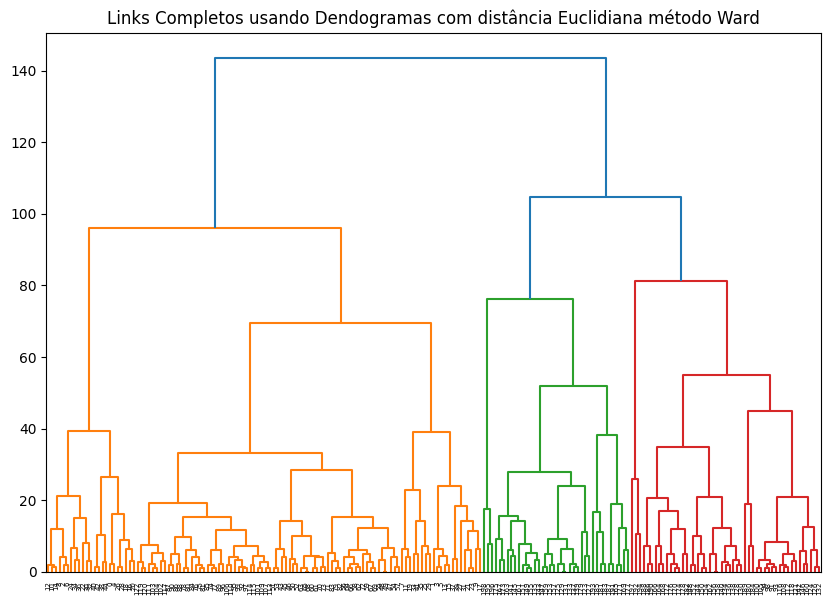

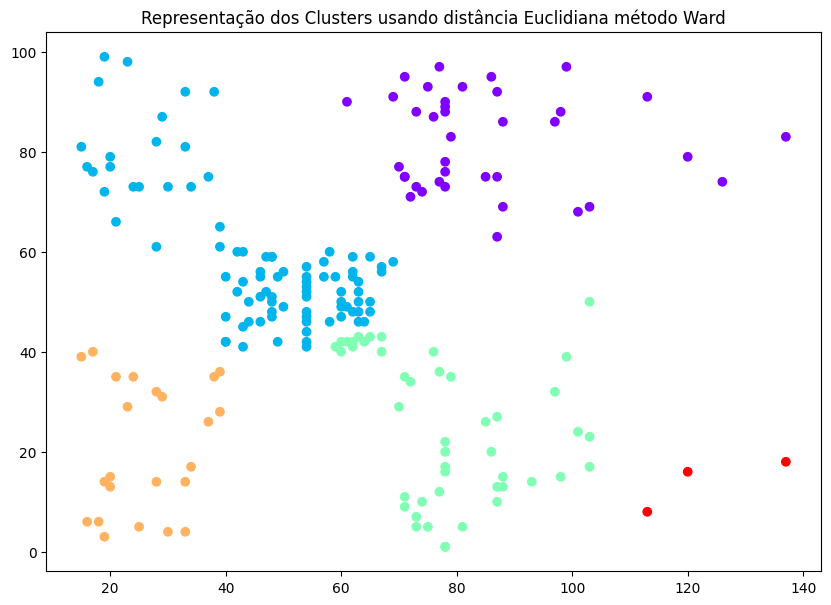

In [38]:
plt.figure(figsize=(10, 7))
plt.title("Links Completos usando Dendogramas com distância Euclidiana método Ward")
dend = sch.dendrogram(sch.linkage(data, method='complete', metric='euclidean'))

euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.title("Representação dos Clusters usando distância Euclidiana método Ward")
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')


# Clusrtering usando a distância Manhattan método Ward

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


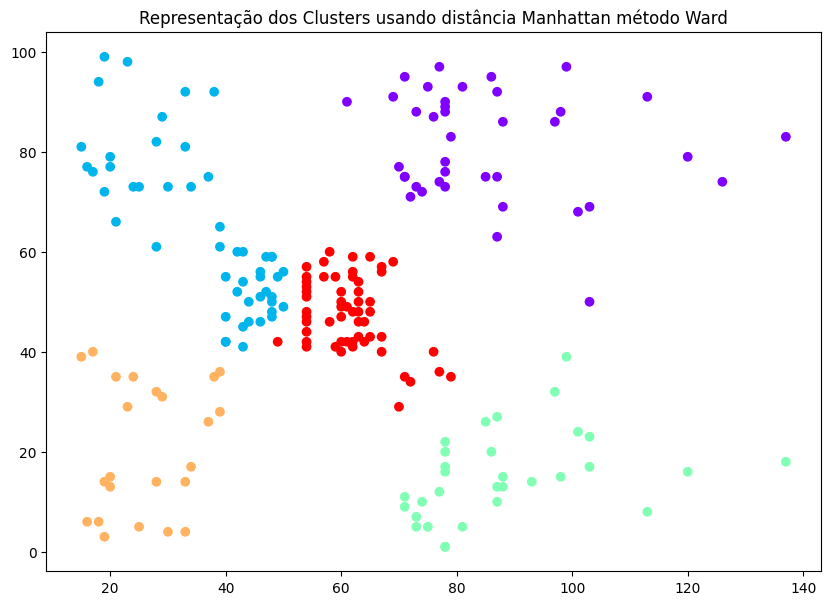

In [39]:
euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='complete')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.title("Representação dos Clusters usando distância Manhattan método Ward")
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')


# Representação de Clusters com uso de ligação única

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


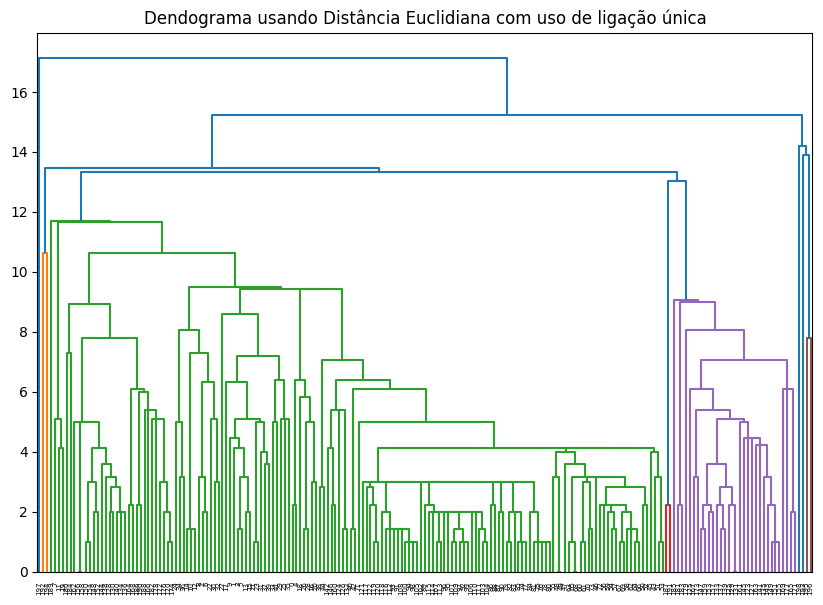

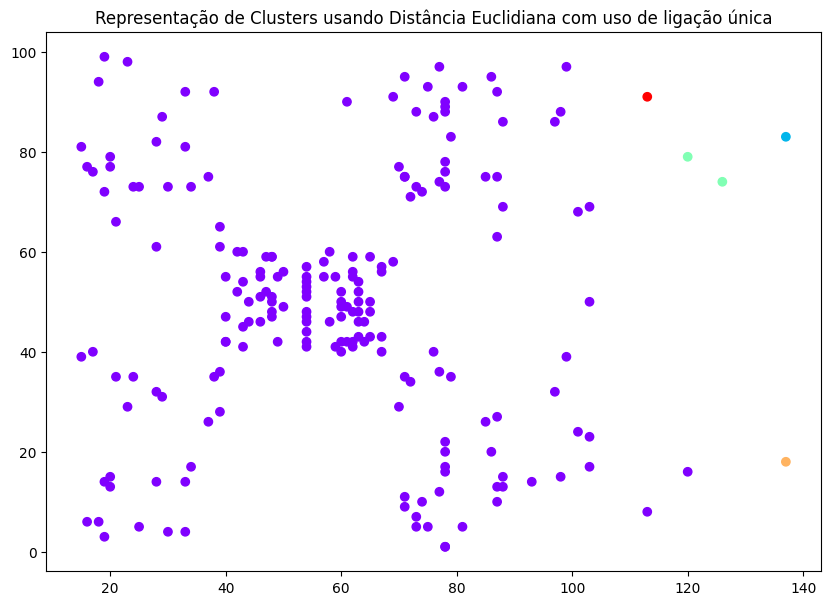

In [40]:
plt.figure(figsize=(10, 7))
plt.title("Dendograma usando Distância Euclidiana com uso de ligação única")
dend = sch.dendrogram(sch.linkage(data, method='single', metric='euclidean'))

euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.title("Representação de Clusters usando Distância Euclidiana com uso de ligação única")
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')


#Representação dos Clusters usando Ligação Única e Métrica Manhathan

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


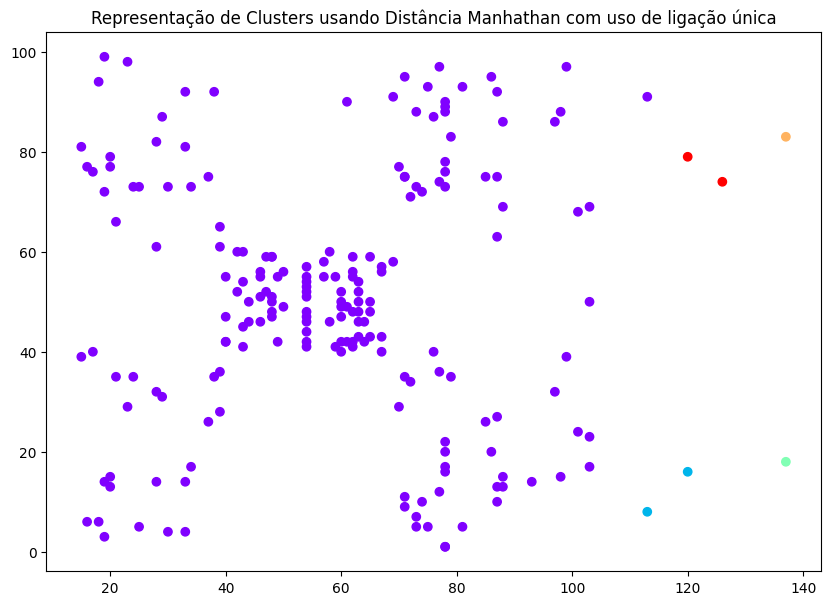

In [41]:
euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='single')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.title("Representação de Clusters usando Distância Manhathan com uso de ligação única")
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')

# Representação de Clusters usando Distância Euclidiana com uso de ligação pela média.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


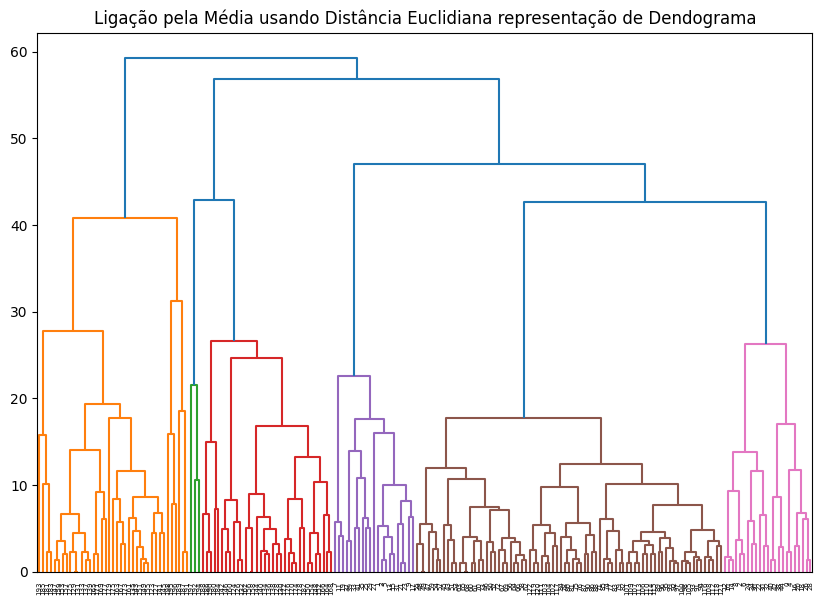

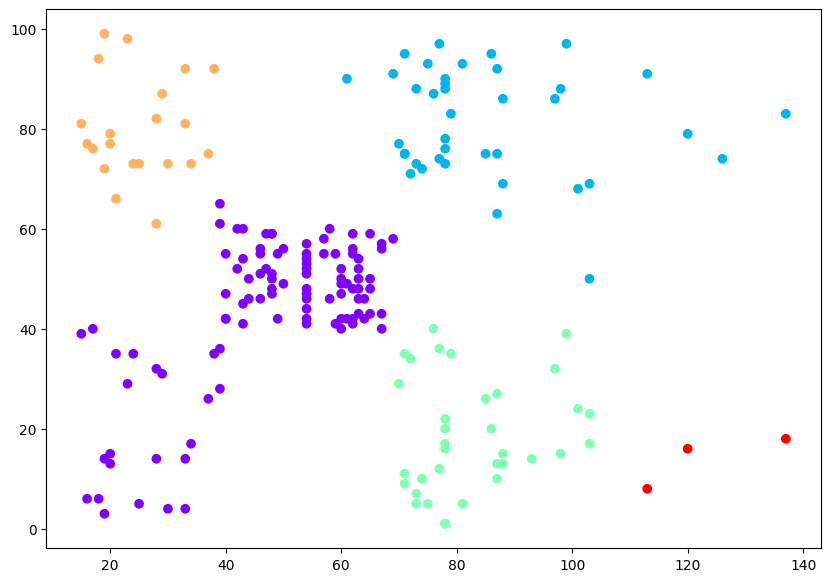

In [42]:
plt.figure(figsize=(10, 7))
plt.title("Ligação pela Média usando Distância Euclidiana representação de Dendograma")
dend = sch.dendrogram(sch.linkage(data, method='average', metric='euclidean'))

euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')

# Ligação pela Média usando Distância Manhattan

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


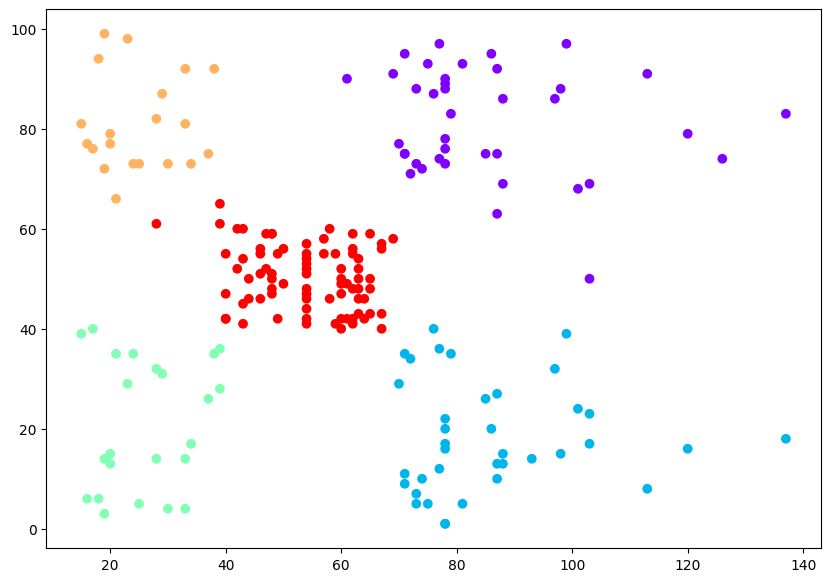

In [43]:
euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='average')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')